In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from scipy import ndimage as ndi
from scipy.ndimage import gaussian_filter
from scipy.ndimage import distance_transform_edt
from sklearn.cluster import KMeans
from skimage import color
from skimage import data
from skimage import measure
from skimage.segmentation import watershed
from skimage import segmentation
from skimage import img_as_float
from skimage.feature import canny
from skimage.feature import peak_local_max
from skimage.morphology import reconstruction

In [2]:
coins = data.coins()
wing = cv2.imread('../testdata/set_1/043870_R_O.JPG')

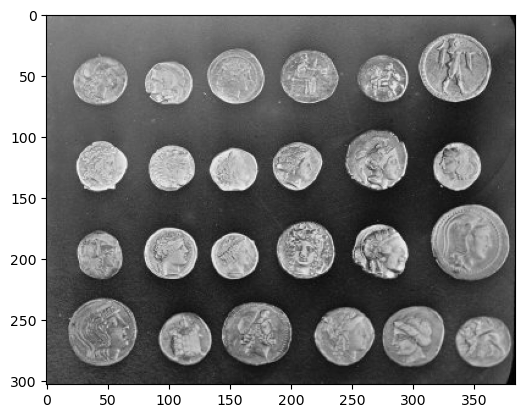

In [27]:
plt.imshow(coins, cmap='gray')

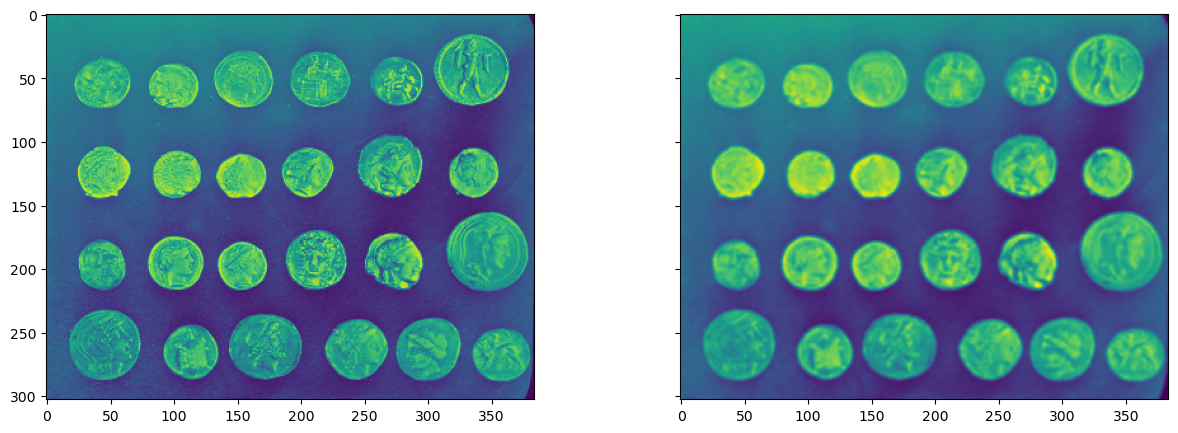

In [4]:
# coins_denoised = filters.median(coins, selem=np.ones((5, 5)))
coins_denoised = cv2.GaussianBlur(coins, (5, 5), 0)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(coins)
ax1.imshow(coins_denoised)

In [5]:
# gradient = sobel(coins_denoised)
# plt.imshow(gradient)

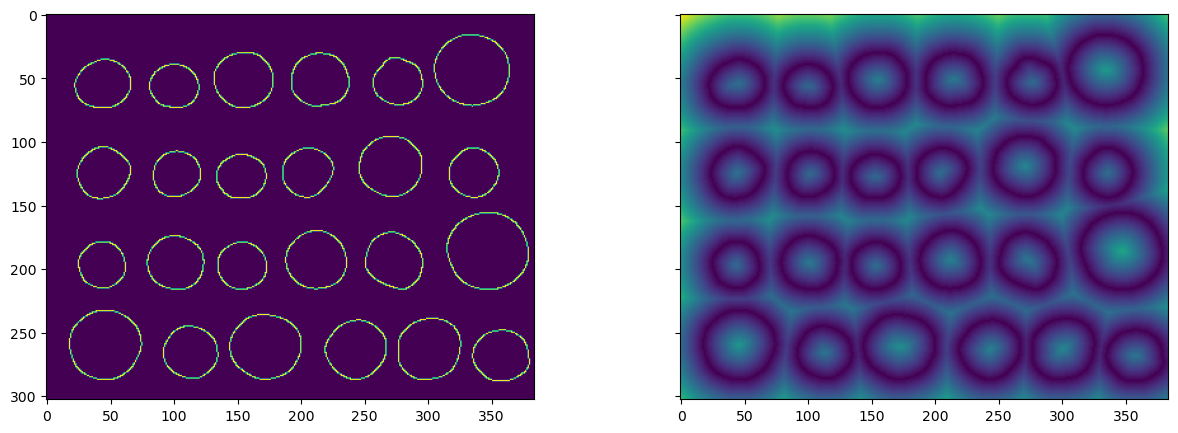

In [6]:
# find edges
edges = canny(coins_denoised, sigma=4)
# distance from edge
dt = distance_transform_edt(~edges)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(edges)
ax1.imshow(dt)

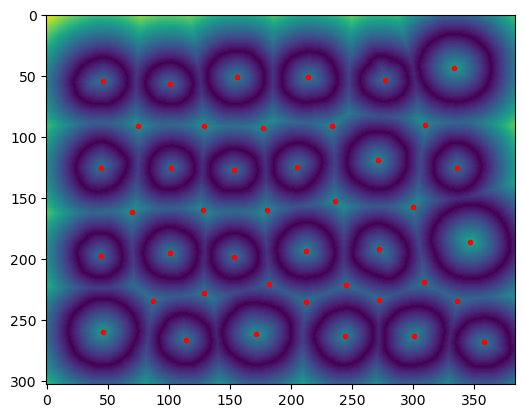

In [7]:
local_max = peak_local_max(dt, min_distance=20, threshold_rel=0.2)

plt.imshow(dt, cmap='viridis')
plt.plot(local_max[:, 1], local_max[:, 0], 'r.')

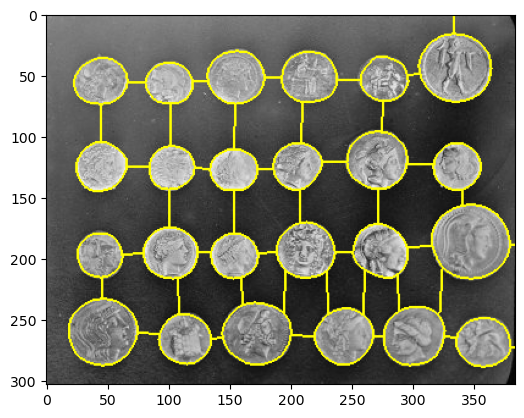

In [8]:
mask = np.zeros(dt.shape, dtype=bool)
mask[tuple(local_max.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-dt, markers)

plt.imshow(segmentation.mark_boundaries(coins, labels))

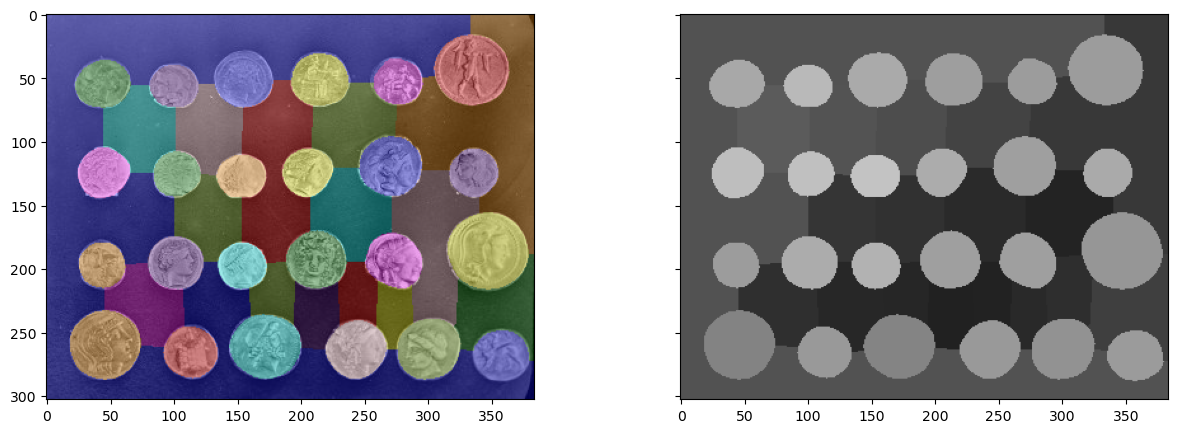

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(color.label2rgb(labels, image=coins))
ax1.imshow(color.label2rgb(labels, image=coins, kind='avg'), cmap='gray')

In [10]:
regions = measure.regionprops(labels, intensity_image=coins)
region_means = [r.mean_intensity for r in regions]

(array([6., 4., 2., 1., 1., 1., 2., 1., 0., 0., 0., 0., 2., 1., 3., 8., 3.,
        3., 1., 3.]),
 array([ 33.66623628,  41.75153585,  49.83683541,  57.92213498,
         66.00743454,  74.09273411,  82.17803367,  90.26333324,
         98.3486328 , 106.43393237, 114.51923193, 122.6045315 ,
        130.68983106, 138.77513063, 146.86043019, 154.94572976,
        163.03102932, 171.11632888, 179.20162845, 187.28692801,
        195.37222758]),
 <BarContainer object of 20 artists>)

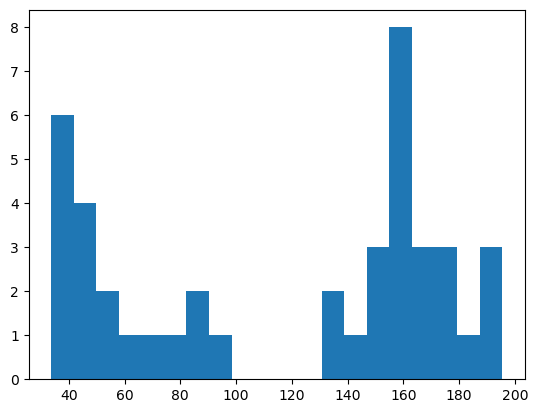

In [11]:
plt.hist(region_means, bins=20)

In [12]:
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[ 54.71947444]
 [163.62166601]]


In [13]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [14]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    if bg_fg == 1:
        classified_labels[tuple(region.coords.T)] = bg_fg

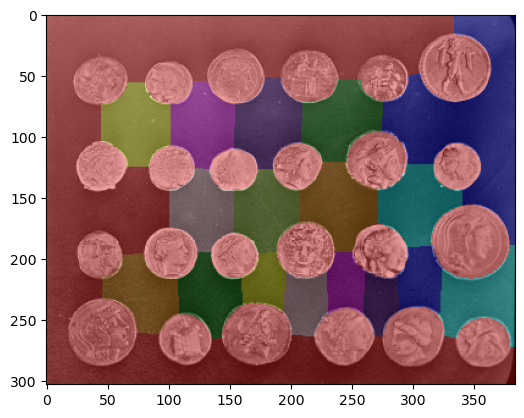

In [15]:
plt.imshow(color.label2rgb(classified_labels, image=coins))

In [18]:
# Calculate the size of each labeled region
# unique_labels, counts = np.unique(classified_labels, return_counts=True)

i = 1
for label, size in label_sizes.items():
    if label > 1:
        print(f"Coin {i}: Size {size} pixels")
        i += 1

# Optionally plot the segmented regions
plt.imshow(color.label2rgb(classified_labels, image=coins, bg_label=0))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [33]:
type(labels)

numpy.ndarray